In [1]:
!pip install pandas
import pandas as pd

In [2]:
!conda install -c conda-forge fbprophet --yes

Solving environment: done


==> WARNING: A newer version of conda exists. <==
  current version: 4.8.3
  latest version: 4.8.4

Please update conda by running

    $ conda update -n base -c defaults conda



# All requested packages already installed.



In [3]:
from fbprophet import Prophet

Importing plotly failed. Interactive plots will not work.


In [4]:
data3 = pd.read_csv("MAR (1).csv")
data4 = pd.read_csv("MAR.csv")

from fbprophet.plot import plot_plotly, plot_components_plotly

data3=data3.rename(columns={'Date':'ds', 'Close':'y'})
data4=data4.rename(columns={'Date':'ds', 'Close':'y'})

In [5]:
data3.head()

,ds,Open,High,Low,y,Adj Close,Volume
0,2016-01-18,60.439999,63.610001,56.430000,62.459999,58.866291,24342400
1,2016-01-25,62.400002,62.450001,58.799999,61.279999,57.754189,18330700
2,2016-02-01,60.320000,61.900002,57.689999,60.009998,56.557247,19019800
3,2016-02-08,59.590000,63.889999,57.889999,63.799999,60.129192,22511800
4,2016-02-15,64.269997,67.879997,63.980000,65.709999,61.929295,21991000


In [6]:
m4 = Prophet(yearly_seasonality = True)

m4.fit(data3)

INFO:fbprophet:Disabling weekly seasonality. Run prophet with weekly_seasonality=True to override this.
INFO:fbprophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.


In [7]:
future = m4.make_future_dataframe(periods = 228)
forecast = m4.predict(future)
forecast[['ds', 'yhat', 'yhat_lower', 'yhat_upper']].tail()

,ds,yhat,yhat_lower,yhat_upper
432,2020-08-24,156.207447,147.031823,165.642119
433,2020-08-25,156.376707,146.382428,166.161064
434,2020-08-26,156.549548,147.117652,166.129735
435,2020-08-27,156.724059,146.791281,166.068546
436,2020-08-28,156.898501,147.554674,166.729455


INFO:matplotlib.category:Using categorical units to plot a list of strings that are all parsable as floats or dates. If these strings should be plotted as numbers, cast to the appropriate data type before plotting.
INFO:matplotlib.category:Using categorical units to plot a list of strings that are all parsable as floats or dates. If these strings should be plotted as numbers, cast to the appropriate data type before plotting.


Text(0, 0.5, 'Close of stock')

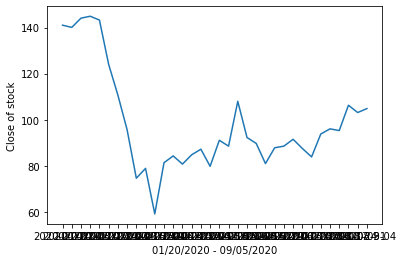

In [8]:
import matplotlib.pyplot as plt

plt.plot(data4.ds,data4.y)
plt.xlabel('01/20/2020 - 09/05/2020')
plt.ylabel('Close of stock')

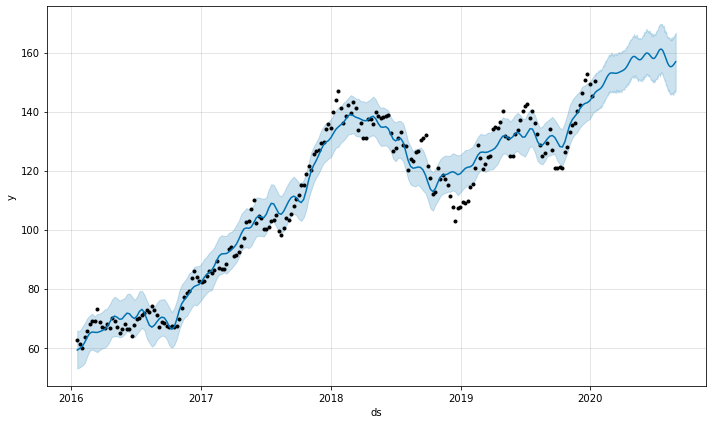

In [9]:
fig1 = m4.plot(forecast)

In [10]:
data4.tail()

,ds,Open,High,Low,y,Adj Close,Volume
29,2020-08-10,94.250000,101.620003,93.300003,96.010002,96.010002,20632500
30,2020-08-17,97.220001,97.500000,92.070000,95.269997,95.269997,9660400
31,2020-08-24,96.010002,106.610001,95.000000,106.260002,106.260002,14770600
32,2020-08-31,105.250000,107.900002,100.760002,103.089996,103.089996,9853100
33,2020-09-04,104.889999,107.040001,103.239998,104.820000,104.820000,2701155


In [11]:
forecast.tail()

,ds,trend,yhat_lower,yhat_upper,trend_lower,trend_upper,additive_terms,additive_terms_lower,additive_terms_upper,yearly,yearly_lower,yearly_upper,multiplicative_terms,multiplicative_terms_lower,multiplicative_terms_upper,yhat
432,2020-08-24,161.326132,147.031823,165.642119,154.016462,168.208021,-5.118685,-5.118685,-5.118685,-5.118685,-5.118685,-5.118685,0.0,0.0,0.0,156.207447
433,2020-08-25,161.399501,146.382428,166.161064,154.041977,168.324047,-5.022794,-5.022794,-5.022794,-5.022794,-5.022794,-5.022794,0.0,0.0,0.0,156.376707
434,2020-08-26,161.472869,147.117652,166.129735,154.055551,168.455360,-4.923322,-4.923322,-4.923322,-4.923322,-4.923322,-4.923322,0.0,0.0,0.0,156.549548
435,2020-08-27,161.546238,146.791281,166.068546,154.082199,168.601978,-4.822179,-4.822179,-4.822179,-4.822179,-4.822179,-4.822179,0.0,0.0,0.0,156.724059
436,2020-08-28,161.619606,147.554674,166.729455,154.117606,168.748597,-4.721106,-4.721106,-4.721106,-4.721106,-4.721106,-4.721106,0.0,0.0,0.0,156.898501


In [1]:
marriott_impact = (104.820000 - 156.898501)/156.898501 * 100
print("Marriott's stocks have been impacted by Covid-19(from the date when the first case was reported in the USA) against the normal flow by\n", marriott_impact, "% as of \n09/05/2020")

Marriott's stocks have been impacted by Covid-19(from the date when the first case was reported in the USA) against the normal flow by
 -33.19247836536056 % as of 
09/05/2020
